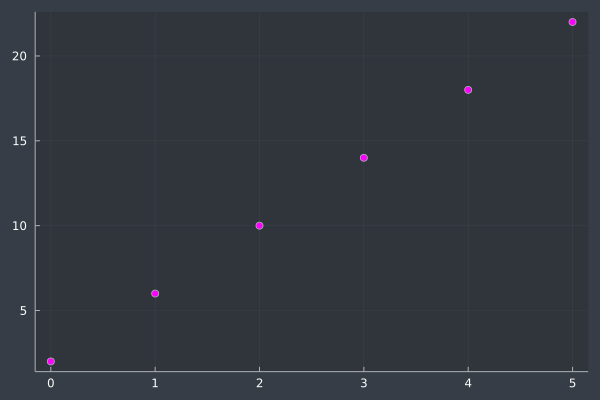

In [5]:
using Flux
using Plots

# This was previously an error: theme(dark:)
theme(:dark)

# Target Function
target_function(x) = 4x + 2


# Create Artificial Data
# Note! These are row feature vectors
x_train, x_test = hcat(0:5...), hcat(6:10...)

# Apply the target function to the test and train row vectors
y_train, y_test = target_function.(x_train), target_function.(x_test)

# Visualize the data 
Plots.scatter(x_train, y_train, color = "magenta", legend = false)

---

## The Single Artificial Neuron Model
A **single artificial neuron** is a **computational unit**, or **function**, that takes as input a feature vector, and outputs a real value in the case of regression, or a label in the case of classification. The single neuron model consist of several fields depicted in the figure below. 

<p align="center">
    <img src="single_neuron.png" width="500">
</p>

We can create a single artificial neuron with one weight and one bias using Flux.jl. For example, 
```julia
# Define a simple model with one input node
model = Flux.Dense(1, 1)

println("model weight variable = $(model.W)")
println("model bias variable = $(model.b)")
```

---

In [8]:
# Define a simple model with one input node
model = Flux.Dense(1, 1)

# 
println("model weight variable = $(model.W)") # OR model.weight
println("model bias variable = $(model.b)") # OR model.bias

model weight variable = Float32[0.509033;;]
model bias variable = Float32[0.0]


---

Single artifical neurons are functions, and Flux.jl treats them as such:
```julia
# Models are predictive functions
model(x_train)
```

---

In [9]:
# Models are predictive functions
model(x_train)

1×6 Matrix{Float32}:
 0.0  0.509033  1.01807  1.5271  2.03613  2.54517

---

For linear regression, it is standard to set the loss function of our single neuron to be the **mean squared error function**:
$
MSE(X, y) = \frac{1}{2N}\sum_{i=1}^N(\hat{y}_i - y_i)^2
$

We can define this loss function with the following code.
```julia
loss(x, y) = Flux.Losses.mse(model(x), y)

println("Current Loss = $(loss(x_train, y_train))")
```

---

In [10]:
# Define Mean Squared Error Loss Function
loss(x, y) = Flux.Losses.mse(model(x), y)

println("Current Loss = $(loss(x_train, y_train))")

Current Loss = 150.62245


---

In order to **train**, or update, the single neurons weights and bias to minimize the loss function we need to define an optimizer, such as **gradient descent**, or **ADAM**. We will also need to format are training data as an ```Array``` of tuples $(x, y)$, and gather the weights and bias of the single neuron. 
```julia
# Define Gradient Descent Optimizer
opt = Flux.Descent()

# Format your Data
data = [(x_train, y_train)]

# Collect weights and bias for your Models
parameters = Flux.params(model)
```

---

In [11]:
# Define Gradient Descent Optimizer
opt = Flux.Descent(0.01)

# Format your Data
data = [(x_train, y_train)]

# Collect weights and bias for your Models
parameters = Flux.params(model)

Params([Float32[0.509033;;], Float32[0.0]])

---

Now that we have a loss function, parameters to be trained, training data, and an optimizer, we can next train our paramaters to decrease the loss function of the model. 
```julia
println("Old Loss = $(loss(x_train, y_train))")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(x_train, y_train))")
```

---

In [12]:
println("Old Loss = $(loss(x_train, y_train))")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(x_train, y_train))")

Old Loss = 150.62245
New Loss = 97.11747


---

Suprisingly, ```Flux.Decent()``` is **full gradient descent**. In practice this can be very slow, so we adapt this optimizer to implement **stochastic gradient descent** as follows:
```julia
println("Old Loss = $(loss(x_train, y_train))")
(m, n) = size(x_train)
epochs = 1_000
for _ in 1:epochs
    for i in 1:n
        Flux.train!(loss, parameters, [(x_train[:, i], y_train[:, i])], opt)
        println("New Loss = $(loss(x_train, y_train))")
    end
end
```

---

In [13]:
println("Old Loss = $(loss(x_train, y_train))")
(m, n) = size(x_train)
epochs = 1_000
for _ in 1:epochs
    for i in 1:n
        Flux.train!(loss, parameters, [(x_train[:, i], y_train[:, i])], opt)
        println("New Loss = $(loss(x_train, y_train))")
    end
end

Old Loss = 97.11747
New Loss = 96.50006
New Loss = 89.74253
New Loss = 72.40949
New Loss = 46.12434
New Loss = 20.449862
New Loss = 5.4046025
New Loss = 5.3147864
New Loss = 4.8018203
New Loss = 3.766085
New Loss = 2.4081116
New Loss = 1.2112399
New Loss = 0.54617405
New Loss = 0.52171785
New Loss = 0.45059577
New Loss = 0.35868046
New Loss = 0.2799298
New Loss = 0.23634957
New Loss = 0.22762047
New Loss = 0.21533523
New Loss = 0.19503553
New Loss = 0.17926534
New Loss = 0.1732379
New Loss = 0.17395972
New Loss = 0.18514341
New Loss = 0.1758601
New Loss = 0.1647809
New Loss = 0.15926336
New Loss = 0.15881485
New Loss = 0.15900666
New Loss = 0.16801228
New Loss = 0.15984039
New Loss = 0.15111645
New Loss = 0.14766267
New Loss = 0.1478923
New Loss = 0.14750558
New Loss = 0.15530072
New Loss = 0.14780608
New Loss = 0.14003356
New Loss = 0.13716991
New Loss = 0.13749917
New Loss = 0.13699584
New Loss = 0.14410086
New Loss = 0.13715975
New Loss = 0.13001077
New Loss = 0.12742357
New Loss = 

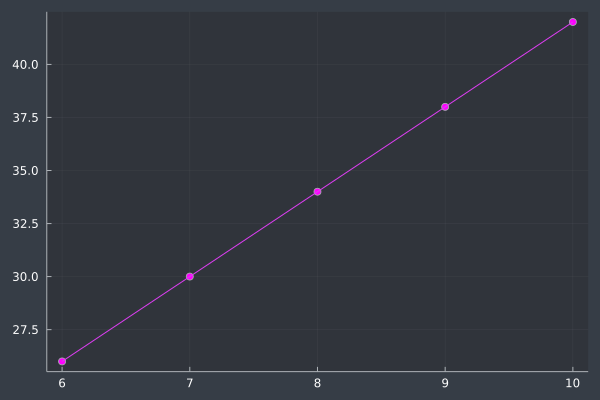

In [14]:
scatter(x_test, y_test, color = "magenta")
domain = LinRange(6, 10, 100)

plot!(domain, domain .* model.W .+ model.b, legend = false)

In [15]:
using RDatasets
using DataFrames
using Flux 

iris = RDatasets.dataset("datasets", "iris")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


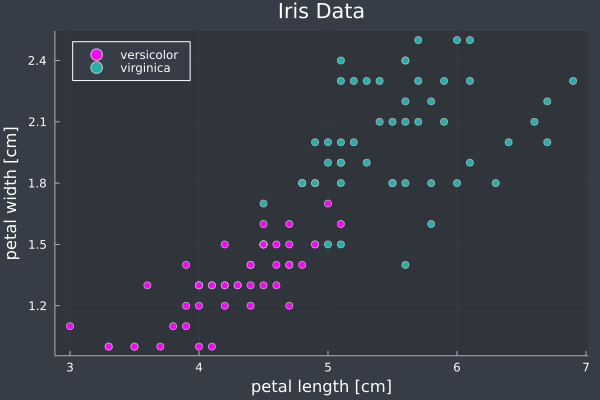

In [16]:
theme(:dark)
Plots.scatter(iris[51:150, :PetalLength],
            iris[51:150, :PetalWidth],
            xlabel = "petal length [cm]",
            ylabel = "petal width [cm]",
            group = iris[51:150, :Species],
            color = [:magenta :lightseagreen],
            title = "Iris Data",
            legend = :topleft)

---

## Logistic Regression Single Neuron with Multiple Inputs
Thus far we have only used a single feature measurement as input into our single neuron model, but what happens when we use *multiple measurements*. For example, we could use petal length and petal width. With two inputs our model can be depicted by the figure below.

### The Logistic Single Neuron Model with Multiple Feature Inputs


<p align="center">
    <img src="multi_logistic_neuron.png" width="500">
</p>

We can format our data and create a single neuron model matching this figure with the following code.
```julia
X = Matrix(iris[51:150, [:PetalLength, :PetalWidth]])
X = X' # Note the dimensions

y = iris[51:150, :Species]
y = [flower == "versicolor" ? 0 : 1 for flower in y]
y = y'

model = Dense(2, 1, Flux.σ)

loss(x, y) = Flux.Losses.binarycrossentropy(model(x), y)

# Define gradient descent optimizer
opt = Flux.Descent()

# Format your Data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)
```


---

In [17]:
X = Matrix(iris[51:150, [:PetalLength, :PetalWidth]])
println("Old shape $(size(X))")
X = X' # Note the dimensions
println("New shape $(size(X))")

y = iris[51:150, :Species]
y = [flower == "versicolor" ? 0 : 1 for flower in y]
y = y'

# Define 2 input 1 output neuron
model = Flux.Dense(2, 1, Flux.σ)

# Define binary cross entropy loss
loss(x, y) = Flux.Losses.binarycrossentropy(model(x), y)

# Define gradient descent optimizer
opt = Flux.Descent(0.012)

# Format your data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

Old shape (100, 2)
New shape (2, 100)


Params([Float32[-0.109148875 -0.005768386], Float32[0.0]])

---

We can view the linear seperator generated by observing the theoretical formulation of the **pre-activation** and **post-activation* values of a single artifical neuron. 

### Preactivation 
$$
z = w_1 x_1 + w_2 x_2 + b
$$

### Postactivation 
$$
a = \sigma(z)
$$

$$
x_2 = -(w_1 x_1 +b)/w_2
$$

---

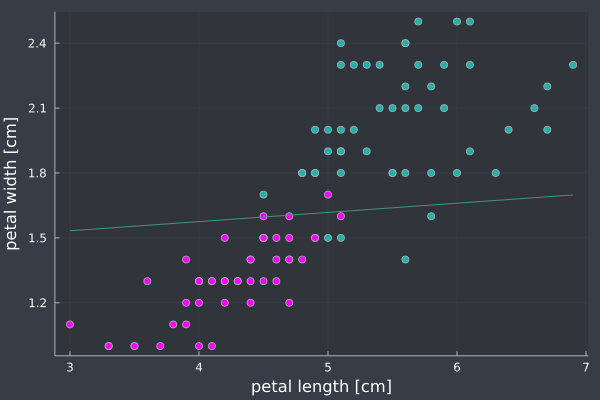

In [19]:

scatter(iris[51:end, :PetalLength], 
        iris[51:end, :PetalWidth], 
        xlabel = "petal length [cm]",
        ylabel = "petal width [cm]", 
        group = iris[51:end, :Species], 
        color = [:magenta :lightseagreen],
        legend = false)

for epoch in 1:9_000
    Flux.train!(loss, parameters, data, opt)
end

(w, b) = params(model)
domain = LinRange(minimum(iris[51:end, :PetalLength]),
                  maximum(iris[51:end, :PetalLength]), 100)
plot!(domain, [-(w[1]*x + b[1])/w[2] for x in domain], legend = false)

In [ ]:
model = Flux.Chain(
                    Dense(3, 40, Flux.σ),
                    Dense(40, 40, Flux.σ),
                    Dense(40, 3),
                    Flux.softmax,
                )
# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

println("Old Loss = $(loss(X, y))")

# Define gradient descent optimizer
opt = Flux.Descent()

# Format your data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(X, y))")

In [ ]:
# Define gradient descent optimizer
opt = Flux.Descent()

# Format your data
data = [(X, y)]

# Collect weights and bias for your model
parameters = Flux.params(model)

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

loss(X, y)

In [ ]:
for epoch in 1:10_000
    Flux.train!(loss, parameters, data, opt)
end

loss(X, y)

In [ ]:
sum(argmax(y[:, i]) != argmax(model(X[:, i])) for i in 1:150)

In [ ]:
plot(X[:, 1], model(X))

In [ ]:
X = Matrix(iris[!, [:SepalLength, :SepalWidth]])
X = X'

y = iris[!, :Species]
y = Flux.onehotbatch(y, ["setosa", "versicolor", "virginica"])

model = Flux.Chain(
                    Dense(2, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 3),
                    Flux.softmax,
                )

model(X)

In [ ]:
predict(x, model) =argmax(model(x))

In [ ]:
predict(X[:, 1], model)